<a href="https://colab.research.google.com/github/FestusCJ/MorePorfolioProjects/blob/master/MovieProject_Python_Correlation__V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import relevant packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



In [5]:
#import local file into google colab using the command below
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


In [6]:
#transform imported file into dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['movies.csv']))
# Dataset is now stored in a Pandas Dataframe

In [7]:
# Display the first five rows to get glimpse of the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
#check for missing data

for col in df.columns:
    prt_missing = np.mean(df[col].isnull())
    print ('{} - {}%'.format(col, prt_missing))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [9]:
#Identify the data types of our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [11]:
#let's do some descriptive analysis - this automatically skip cells with NaN values

df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [12]:
df.describe(include=['object'])

,name,rating,genre,released,director,writer,star,country,company
count,7668,7591,7668,7666,7668,7665,7667,7665,7651
unique,7512,12,19,3414,2949,4535,2814,59,2385
top,Nobody's Fool,R,Comedy,"February 14, 1986 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures
freq,3,3697,2245,9,38,37,43,5475,377


In [13]:
# Further evaluation for missing data as NA could not be converted to Integer

missing_data = df.isnull()
missing_data

# "True" means the value is a missing value while "False" means the value is not a missing value.

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False


In [14]:
# Counting missing values in the column

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

name
False    7668
Name: name, dtype: int64

rating
False    7591
True       77
Name: rating, dtype: int64

genre
False    7668
Name: genre, dtype: int64

year
False    7668
Name: year, dtype: int64

released
False    7666
True        2
Name: released, dtype: int64

score
False    7665
True        3
Name: score, dtype: int64

votes
False    7665
True        3
Name: votes, dtype: int64

director
False    7668
Name: director, dtype: int64

writer
False    7665
True        3
Name: writer, dtype: int64

star
False    7667
True        1
Name: star, dtype: int64

country
False    7665
True        3
Name: country, dtype: int64

budget
False    5497
True     2171
Name: budget, dtype: int64

gross
False    7479
True      189
Name: gross, dtype: int64

company
False    7651
True       17
Name: company, dtype: int64

runtime
False    7664
True        4
Name: runtime, dtype: int64



In [15]:
#we'd like to carry out analysis on how movie features are related to gross earnings. So lets drop rows which do not have gross

df=df.dropna(subset=['gross'], axis=0)
df.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [16]:
#In order to view all values on the table, we'll have to remove any restrcitions on the view

pd.set_option('display.max_rows', None)

In [17]:
#Present the data with the highest grossing films at the top

df = df.sort_values(by=['gross'], inplace = False, ascending = False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [18]:
# to drop duplicates use df['column'].drop_duplicates().sort_values(ascending = False)

In [19]:
#Find correlations between some parameters and earnings
#There may be high correlation between budget and gross, company and gross, votes and gross, director and gross & run time and gross
#Let's generate a plot to see the correlations

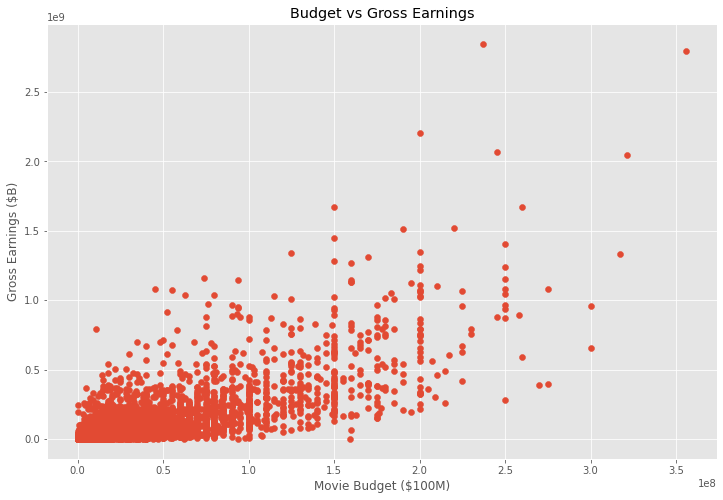

In [20]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Movie Budget ($100M)')

plt.ylabel('Gross Earnings ($B)')

plt.show()

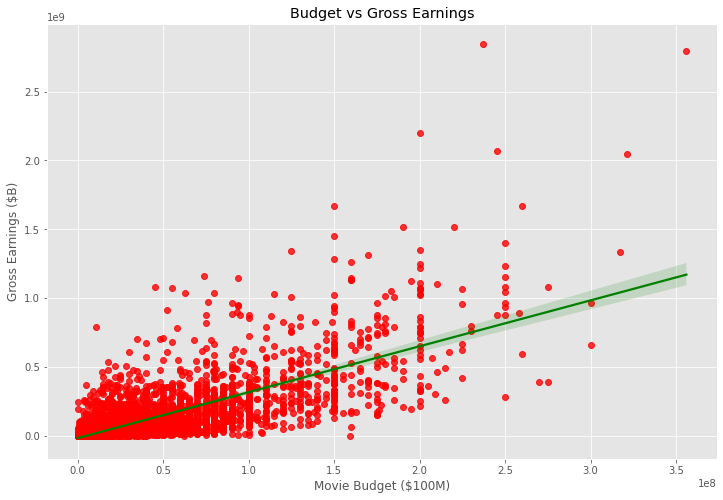

In [21]:
#Plotting budget vs gross using seaborn to show correlation line

sns.regplot(x= 'budget', y= 'gross', data= df, scatter_kws={'color': 'red'}, line_kws={'color': 'green'})

plt.title('Budget vs Gross Earnings')

plt.xlabel('Movie Budget ($100M)')

plt.ylabel('Gross Earnings ($B)')

plt.show()

In [22]:
#Check correlation #types of correlation include pearson, kendall, spearman. Pearson is default correlation.

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.091821,0.215740,0.327781,0.257486,0.114706
score,0.091821,1.000000,0.413096,0.071792,0.186258,0.397321
votes,0.215740,0.413096,1.000000,0.440021,0.630757,0.309536
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.114706,0.397321,0.309536,0.318595,0.245216,1.000000


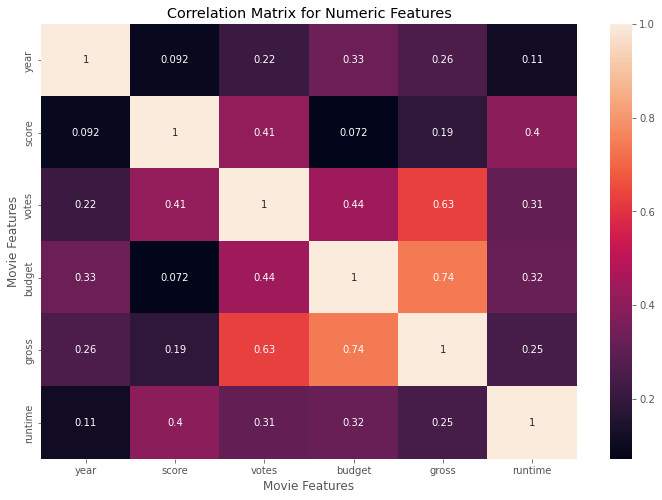

In [23]:
#visualize correlation
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [24]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [25]:
#since correlation coefficients work on numbers, let's convert other categories/moviefeatures to integers

df_numeric = df

for col in df_numeric.columns:
    if (df_numeric[col].dtype == 'object'):
        df_numeric[col] = df_numeric[col].astype('category')
        df_numeric[col] = df_numeric[col].cat.codes
        
df_numeric.head()
        
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,519,5,0,2009,683,7.8,1100000.0,1116,1719,2233,53,237000000.0,2.847246e+09,2148,162.0
7445,521,5,0,2019,179,8.4,903000.0,161,717,2141,53,356000000.0,2.797501e+09,1532,181.0
3045,6727,5,6,1997,691,7.8,1100000.0,1116,1719,1524,53,200000000.0,2.201647e+09,2148,194.0
6663,5008,5,0,2015,685,7.8,876000.0,1086,2468,504,53,245000000.0,2.069522e+09,1470,138.0
7244,522,5,0,2018,188,8.4,897000.0,161,717,2141,53,321000000.0,2.048360e+09,1532,149.0


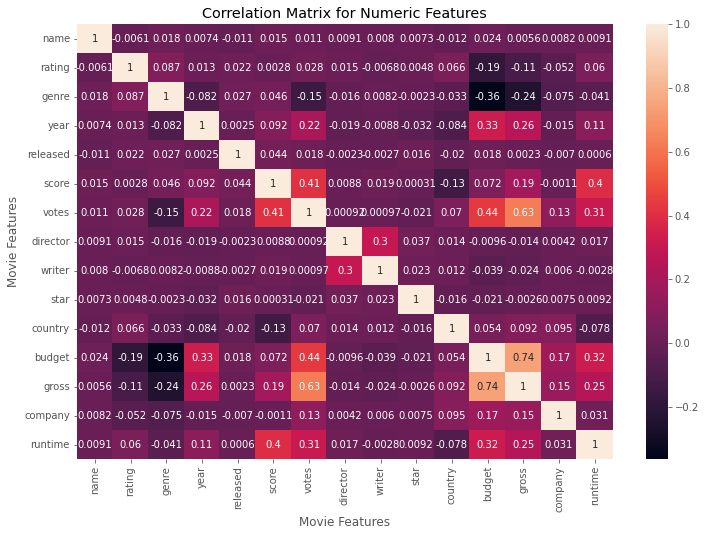

In [26]:
#check all correlations

correlation_matrix = df_numeric.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [27]:
#checking correlation in tabular form

df_numeric.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.006091,0.017885,0.007404,-0.011033,0.015473,0.011429,0.009092,0.008008,0.007278,-0.012027,0.023630,0.005557,0.008155,0.009142
rating,-0.006091,1.000000,0.087325,0.012776,0.022026,0.002766,0.028082,0.014723,-0.006793,0.004774,0.066465,-0.187347,-0.107339,-0.052477,0.059870
genre,0.017885,0.087325,1.000000,-0.082252,0.026804,0.046093,-0.149289,-0.016412,0.008231,-0.002322,-0.033283,-0.363257,-0.243059,-0.074570,-0.041023
year,0.007404,0.012776,-0.082252,1.000000,0.002465,0.091821,0.215740,-0.019116,-0.008780,-0.032319,-0.084488,0.327781,0.257486,-0.014883,0.114706
released,-0.011033,0.022026,0.026804,0.002465,1.000000,0.044301,0.018043,-0.002315,-0.002699,0.015812,-0.020083,0.018319,0.002341,-0.007031,0.000605
score,0.015473,0.002766,0.046093,0.091821,0.044301,1.000000,0.413096,0.008810,0.018648,0.000310,-0.129474,0.071792,0.186258,-0.001107,0.397321
votes,0.011429,0.028082,-0.149289,0.215740,0.018043,0.413096,1.000000,0.000919,0.000972,-0.021274,0.069934,0.440021,0.630757,0.131020,0.309536
director,0.009092,0.014723,-0.016412,-0.019116,-0.002315,0.008810,0.000919,1.000000,0.297601,0.036794,0.014435,-0.009593,-0.014490,0.004213,0.016942
writer,0.008008,-0.006793,0.008231,-0.008780,-0.002699,0.018648,0.000972,0.297601,1.000000,0.023374,0.011871,-0.039188,-0.023574,0.005972,-0.002816
star,0.007278,0.004774,-0.002322,-0.032319,0.015812,0.000310,-0.021274,0.036794,0.023374,1.000000,-0.016192,-0.020515,-0.002602,0.007518,0.009227


In [28]:
#Lets unstack the table and see how each features are correlated

corr_matrix = df_numeric.corr()

corr_pairs = corr_matrix.unstack()

corr_pairs

name      name        1.000000
          rating     -0.006091
          genre       0.017885
          year        0.007404
          released   -0.011033
          score       0.015473
          votes       0.011429
          director    0.009092
          writer      0.008008
          star        0.007278
          country    -0.012027
          budget      0.023630
          gross       0.005557
          company     0.008155
          runtime     0.009142
rating    name       -0.006091
          rating      1.000000
          genre       0.087325
          year        0.012776
          released    0.022026
          score       0.002766
          votes       0.028082
          director    0.014723
          writer     -0.006793
          star        0.004774
          country     0.066465
          budget     -0.187347
          gross      -0.107339
          company    -0.052477
          runtime     0.059870
genre     name        0.017885
          rating      0.087325
        

In [29]:
#let's sort and pair the above correlation and see how it comes together

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.363257
budget    genre      -0.363257
genre     gross      -0.243059
gross     genre      -0.243059
rating    budget     -0.187347
budget    rating     -0.187347
genre     votes      -0.149289
votes     genre      -0.149289
score     country    -0.129474
country   score      -0.129474
gross     rating     -0.107339
rating    gross      -0.107339
year      country    -0.084488
country   year       -0.084488
genre     year       -0.082252
year      genre      -0.082252
country   runtime    -0.078174
runtime   country    -0.078174
genre     company    -0.074570
company   genre      -0.074570
          rating     -0.052477
rating    company    -0.052477
genre     runtime    -0.041023
runtime   genre      -0.041023
writer    budget     -0.039188
budget    writer     -0.039188
country   genre      -0.033283
genre     country    -0.033283
star      year       -0.032319
year      star       -0.032319
writer    gross      -0.023574
gross     writer     -0.023574
votes   

In [30]:
# Let's view pairs that have a high correlation. In this case let's use correlation values greater than 0.5

high_corr = sorted_pairs[(sorted_pairs) > 0.5 ]
high_corr

votes     gross       0.630757
gross     votes       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [31]:
#From our analysis we found out that budget and votes have high correlation with gross earnings

#However director, company and run time did not have a high correlation with gross earnings